--------------------------------------------------------------------------------------------

The Effective Properties of the lamina are:
--------------------------------------------------------------------------------------------

Longitudinal Stiffness of the composite, E1 (Gpa) = 125.08845000000001


Transverse Stiffness of the lamina, E2 (Gpa) = 8.141794035438362


Poisson's ratio of the lamina, nu12 = 0.27005


Shear Modulus of the lamina, G12 (Gpa) = 3.687103866060496


--------------------------------------------------------------------------------------------



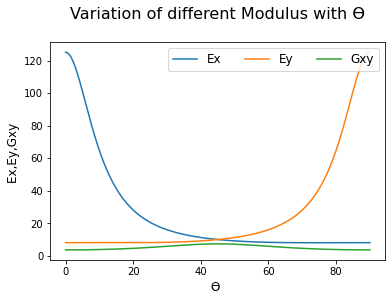

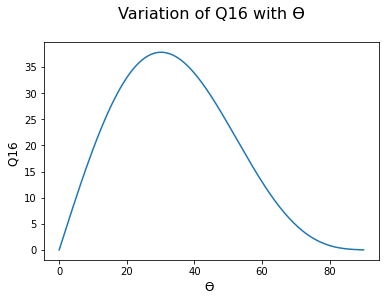


--------------------------------------------------------------------------------------------

ABD Matrix is: 

 [[81145.73462  9127.6752      0.         -0.         -0.          0.     ]
 [ 9127.6752  38882.93395     0.         -0.          0.          0.     ]
 [    0.          0.      10605.60129     0.          0.          0.     ]
 [   -0.         -0.          0.       9294.07764   652.53808   542.73412]
 [   -0.          0.          0.        652.53808   924.51446    94.96451]
 [    0.          0.          0.        542.73412    94.96451   775.69859]]

 For further calculations convenience the unit of A here is GPa-mm, B is GPa and D is GPa/mm. 


--------------------------------------------------------------------------------------------

 
 

Calculation of Margin of safety using Hashins Criteria
--------------------------------------------------------------------------------------------

---------------------------------------------------------------------
 Laminate no.     Pl

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os

#print("Please enter the desired properties of the composite in the Properties text file")
#print("\n")

exists = os.path.isfile("Properties.txt")   
if exists:
    for line in open("Properties.txt"):
        if "#" not in line:
            Ef1 = (float(line.split("	")[1]))
            Ef2 = (float(line.split("	")[2]))
            nu_f = (float(line.split("	")[3]))
            Gf = (float(line.split("	")[4]))
            Em = (float(line.split("	")[5]))
            nu_m = (float(line.split("	")[6]))
            Vf = (float(line.split("	")[7]))
            Gm = (0.5*Em)/(1+nu_m)
else:
    print("Properties File not found")
    
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
def Effective_properties(Ef1, Ef2, Em, Vf):         # Defined Function to calculate effective properties
    E1 = Vf * Ef1 + (1-Vf) * Em                     # Calculation of modulus in longitudinal direction       
    E2 = (Ef2 * Em) / ((Ef2 * (1-Vf)) + (Em * Vf))  # Calculation of modulus in Transverse direction
    nu12 = Vf * nu_f + (1-Vf) * nu_m                # Calculation of Poisson's ratio of the laminate
    G12 = (Gf * Gm) / ((Gm * Vf) + (Gf * (1-Vf)))   # Calculation of Shear Modulus of the laminate
    
    print("--------------------------------------------------------------------------------------------\n")
    print(color.RED + color.BOLD + 'The Effective Properties of the lamina are:' + color.END)
    print("--------------------------------------------------------------------------------------------\n")
    print("Longitudinal Stiffness of the composite, E1 (Gpa) =",E1)
    print("\n")
    print("Transverse Stiffness of the lamina, E2 (Gpa) =",E2)
    print("\n")
    print("Poisson's ratio of the lamina, nu12 =",nu12)
    print("\n")
    print("Shear Modulus of the lamina, G12 (Gpa) =",G12)
    print("\n")
    print("--------------------------------------------------------------------------------------------\n")
    return (E1, E2, nu12, G12)

E1, E2, nu12, G12 = Effective_properties(Ef1, Ef2, Em, Vf)

def compliance_matrix(E1,E2,nu12,G12):             # Defined Function to calculate compliance matrix
    S11 = 1/E1                                     # Defined formulation to calculate elements of compliance matrix
    S12 = -nu12/E1
    S16 = 0
    S21 = -nu12/E1
    S22 = 1/E2
    S26 = 0
    S61 = 0
    S62 = 0
    S66 = 1/G12
    S = np.array([[S11,S12,S16],[S21,S22,S26],[S61,S62,S66]])
    return S
S_Matrix = compliance_matrix(E1,E2,nu12,G12)       # Called function of Compliance matrix to define it golbally

def stiffness_matrix(E1,E2,nu12,G12):              # Defined Function to calculate stiffness matrix
    s_Matrix =  compliance_matrix(E1,E2,nu12,G12)  # Called function of compliance matrix
    Q = np.linalg.inv(s_Matrix)                    # Defined formulation to calculate stiffness matrix
    #print("The Compliance Matrix is =\n\n",S_Matrix)
    #print("\n")
    #print("The Stiffness Matrix is =\n\n",Q)
    #print("\n")
    return Q

Q_Matrix = stiffness_matrix(E1,E2,nu12,G12)        # Called function of Stiffness matrix to define it golbally

def transformation_compliance(S,theta):            # Defined Function to calculate transformation of compliance matrix
    theta_radian = theta*np.pi/180                 
    c = np.cos(theta_radian)
    s = np.sin(theta_radian)
    
    S11 = S[0][0]                                  # Assigned values of elements of compliance matrix to variables for further calculations
    S12 = S[0][1]
    S13 = S[0][2]
    S21 = S[1][0]
    S22 = S[1][1]
    S26 = S[0][2]
    S31 = S[2][0]
    S32 = S[2][1]
    S66 = S[2][2]
    
    S_xx = c**4 * S11 + c**2 * s**2 *(2*S12 + S66) + s**4 * S22   # Defined formulation to calculate elements of tranformed matrix
    S_xy = (c**4 + s**4) *S12 + c**2 * s**2 * (S11+S22-S66)
    S_yy = s**2 * S11 + c**2 * s**2 *(2*S12+S66) + c**4 *S22
    S_xs = 2* c**3 * s * (S11-S12) + 2 * c * s**3 * (S12-S22) - c * s *(c**2 - s**2)*S66
    S_ys = 2* c * s**3 *(S11-S12) + 2* c**3 * s *(S12-S22) + c * s *(c**2 - s**2)*S66
    S_ss = 4* c**2 * s**2 * (S11-S12) - 4* c**2 * s**2 *(S12-S22) + ((c**2- s**2)**2)*S66
    
    S_yx = S_xy
    S_sx = S_xs
    S_sy = S_ys
    
    S_transformed =  np.array([[S_xx, S_xy, S_xs], [S_yx, S_yy, S_ys], [S_sx, S_sy, S_ss]])/10**3 
    
    #print("Transformed Compliance Matrix is a general cordinate system is = \n", S_transformed)
    #print("\n")
    return S_transformed

def transformation_stiffness(Q, theta):           # Defined Function to calculate transformation of stiffness matrix
    theta_radian = theta*np.pi/180
    c = np.cos(theta_radian)
    s = np.sin(theta_radian)

    Q_11 = Q[0][0]                                # Assigned values of elements of stiffness matrix to variables for further calculations
    Q_12 = Q[0][1]                     
    Q_16 = Q[0][2]
    Q_21 = Q[1][0]
    Q_22 = Q[1][1]
    Q_26 = Q[1][2]
    Q_61 = Q[2][0]
    Q_62 = Q[2][1]
    Q_66 = Q[2][2]

    Q_xx = c**4 *Q_11 + 2 * c**2 * s**2 * (Q_12 + 2*Q_66) + s**4 * Q_22   # Defined formulation to calculate elements of tranformed matrix
    Q_xy = c**2 * s**2 * (Q_11 + Q_22 - 4*Q_66) + Q_12 * (c**4 + s**4)
    Q_yy = s**4 * Q_11 + 2 * c**2 * s**2 * (Q_12 + 2*Q_66) + c**4 * Q_22
    Q_xs = c**3 * s * (Q_11 - Q_12) + c * s**3 * (Q_12 - Q_22) - 2 * c * s * (c**2 - s**2)*Q_66
    Q_ys = c * s**3 * (Q_11 - Q_12) + c**3 * s * (Q_12 - Q_22) + 2 * c * s * (c**2 - s**2)*Q_66
    Q_ss = c**2 * s**2 * (Q_11 + Q_22 - 2*Q_12) + pow((c**2 - s**2), 2)*Q_66
   
    Q_yx = Q_xy
    Q_sx = Q_xs
    Q_sy = Q_ys

    Q_transformed = np.array([[Q_xx, Q_xy, Q_xs], [Q_yx, Q_yy, Q_ys], [Q_sx, Q_sy, Q_ss]])*10**3 
    #Unit of Q has been converted into MPa for convenience
    
    #print("The Transformed stiffness matrix in the X-Y coordinate system is = \n", Q_transformed)
    #print("\n")
    return Q_transformed

S_xy = transformation_compliance(S_Matrix, 0)     # Called function of Compliance matrix to define it golbally
Q_xy = transformation_stiffness(Q_Matrix, 0)      # Called function of Compliance matrix to define it golbally

def Engineering_Constants_Transformation(E1, E2, G12, nu12):  # Defined formulation to calculate transformation of engineering constants

    theta = np.linspace(0, math.pi/2, num=200)
    theta_degrees = np.linspace(0, 90, num=200)
    
    nuxy_matrix = []
    Q_xs_matrix = []
    E_x_matrix = []
    E_y_matrix = []
    G_xy_matrix = []

    for angle in theta:
            c = math.cos(angle)
            s = math.sin(angle)
            Q11 = E1/(1-nu12**2 * (E2/E1))
            Q22 = E2/(1-nu12**2 * (E2/E1))
            Q12 = (nu12*E2)/(1-nu12**2 * (E2/E1))
            Q66 = G12
            Ex = (c**4/E1 + c**2 * s**2 * (1/G12 - 2*nu12/E1) + s**4 / E2)**(-1)
            nuxy = Ex*((nu12*(s**4 + s**4))/E1 - c**2 * s**2 *(1/E1 + 1/E2 - 1/G12))
            Ey = (s**4 / E1 + c**2 * s**2 * (1/G12 - 2*nu12/E1) + c**4 / E2)**(-1)
            eetaxy_x = Ex*(c**3 * s * (2/E1 + 2*nu12/E1 - 1/G12) - c*s**3 * (2/E2 + 2*nu12/E1 - 1/G12))
            eetaxy_y = Ey*(c*s**3 * (2/E1 + 2*nu12/E1 - 1/G12) - c**3*s*(2/E2 + 2*nu12/E1 - 1/G12))
            Gxy = pow((4 * c**2 * s**2 * (1/E1 + 1/E2 + 2*nu12/E1) + (c**2 - s**2)**2 / G12), -1)
            Q_xs = c**3 * s**1 * (Q11 - Q12) + c**1 * s**3 * (Q12 - Q22) - 2* c**1 * s**1 * (c**2 - s**2) * Q66

            E_x_matrix.append(Ex)
            E_y_matrix.append(Ey)
            G_xy_matrix.append(Gxy)
            Q_xs_matrix.append(Q_xs)
            
    plot1 = plt. figure(1)
    plt.plot(theta_degrees, E_x_matrix)
    plt.plot(theta_degrees, E_y_matrix)
    plt.plot(theta_degrees, G_xy_matrix)
    plt.title("Variation of different Modulus with \u03F4\n",fontsize = 16)
    plt.xlabel("\u03F4 ",fontsize = 12)
    plt.ylabel("Ex,Ey,Gxy ",fontsize = 12)
    plt.legend(["Ex","Ey","Gxy"],prop={"size":12},loc = 1,ncol=3)
    
    plot2 = plt. figure(2)
    plt.plot(theta_degrees, Q_xs_matrix)
    plt.title("Variation of Q16 with \u03F4\n",fontsize = 16)
    plt.xlabel("\u03F4 ",fontsize = 12)
    plt.ylabel("Q16 ",fontsize = 12)
    
    plt.show()


Engineering_Constants_Transformation(E1, E2, G12, nu12)


def ABD_Matrix(No_of_Layers, Thickness, Ply_Orientation):
    global z 
    z = []  
    N = No_of_Layers
    t = Thickness
    tk = t/N
    
    z0 = -N/2 * tk 
    z.append(z0)
    
    for i in range(0, N):
        presentCoordinate = z[-1] + tk
        z.append(presentCoordinate)
        
    A = np.zeros((3,3))  #Unit of A GN-mm
    B = np.zeros((3,3))  #Unit of B GN
    D = np.zeros((3,3))  #Unit of C GN/mm  

    global Q_temp
    Q_temp = []

    for j in range(1, N+1):
        #print(f"For Ply number {k}:\n")
        Q = transformation_stiffness(Q_Matrix, Ply_Orientation[j-1])
        A = A + np.array(Q) * (z[j] - z[j-1]) 
        B = B + (1/2) * np.array(Q) * (((z[j])**2) - (z[j-1])**2) 
        D = D + (1/3) * np.array(Q) * (((z[j])**3) - (z[j-1])**3)
        
        Q_temp.append(Q)

    #print("\n A Matrix is = \n", A)
    #print("\n")
    #print("\n B Matrix is = \n", B)
    #print("\n")
    #print("\n D Matrix is = \n", D)
    #print("\n")
    
    return A, B, D

No_of_Layers = 8
Thickness = 1
Ply_Orientation = [0, 22, -22, 90, 90, -22, 22, 0]

A, B, D = ABD_Matrix(No_of_Layers, Thickness, Ply_Orientation)

Row_1 = np.concatenate([A,B])
Row_2 = np.concatenate([B,D])

ABD_Matrix = np.concatenate((Row_1,Row_2),axis=1)
ABD_Matrix_1 = np.around(ABD_Matrix,decimals=5)

#print("\nABD Matrix is: = \n",ABD_Matrix_1)

Nx = 100
Ny = 0
Nxy = 0
Mx = 0
My = 0
Mxy = 0

N_bar = np.array([[Nx],[Ny],[Nxy]])
M_bar = np.array([[Mx],[My],[Mxy]])

Load_Matrix = np.concatenate((N_bar,M_bar))
#print("Load matrix = \n",Load_Matrix)
Epsilon_K = np.matmul(np.linalg.inv(ABD_Matrix),Load_Matrix)
abd_matrix = np.linalg.inv(ABD_Matrix)
abd_matrix_1 = np.around(abd_matrix,decimals=3)
Epsilon_0 = np.vsplit(Epsilon_K,2)[0]
Kappa = np.split(Epsilon_K,2)[1]

print("\n--------------------------------------------------------------------------------------------\n")
print(color.PURPLE + color.BOLD + 'ABD Matrix is: ' + color.END)
print("\n",ABD_Matrix_1)
print("\n For further calculations convenience the unit of A here is GPa-mm, B is GPa and D is GPa/mm. \n")
print("\n--------------------------------------------------------------------------------------------")
print(f"\n \n \n")
#print("\n Epsilon K = \n",Epsilon_K)
#print("\n abd_matrix is = \n",abd_matrix_1)
#print("\n Epsilon_0 matrix is = \n",Epsilon_0)
#print("\n Kappa matrix is = \n",Kappa)
#print("\n No of layers = \n",No_of_Layers)

Epsilon_store = []
Sigma_K_store = []
T_sigma_store = []
for i in range(0, No_of_Layers):
    z_average = (z[i] + z[i+1])/2
    Epsilon = np.array(Epsilon_0) + z_average*np.array(Kappa)
    Epsilon_store.append(Epsilon)
    #print(f"\n Epsilon Matrix {i+1}\n", Epsilon)

Sigma_Fiber_CS_store = []
theta_radian_store = []
for i in range(0, No_of_Layers):
    theta = Ply_Orientation[i]
    theta_radian = theta*np.pi/180
    theta_radian_store.append(theta_radian)
    c = np.cos(theta_radian)
    s = np.sin(theta_radian)
    T_sigma = np.array([[c**2, s**2, 2*c*s], [s**2, c**2, -2*c*s], [-c*s, c*s, c**2 - s**2]])
    T_sigma_store.append(T_sigma)
    Sigma_K = np.dot(Q_temp[i],Epsilon)
    Sigma_K_store.append(Sigma_K)
    Sigma_fiber_direction = np.dot(T_sigma, Sigma_K)
    Sigma_Fiber_CS_store.append(Sigma_fiber_direction)
    #print(f"\n T Sigma in fiber direction co-ordinate system for Layer {i+1}\n", T_sigma)
    #print(f"\n Sigma in fiber direction co-ordinate system for Layer {i+1}\n", Sigma_fiber_direction)
#print(Sigma_K_store)
#print(theta_radian_store)

Xt = 1500
Xc = 27
Yt = 570
Yc = 570
S12 = 34



R_Tensile_M = []
R_Compressive_M = []
R_Tensile_F = []
R_Compressive_F = []
Temp_List = []
R_Final = []


def Hashin_Criteria(Xt,Xc,Yt,Yc,S12):

             
    for i in range(0, No_of_Layers):
        S23 = S12
        Sigma_33 = 0
        Sigma_Fiber_CS = Sigma_Fiber_CS_store[i]
        Sigma_11 = Sigma_Fiber_CS[0]
        Sigma_22 = Sigma_Fiber_CS[1]
        Sigma_66 = Sigma_Fiber_CS[2]
        Condition_Matrix = Sigma_22 + Sigma_33
        Condition_Fiber = Sigma_11
        
        #print(Condition_Matrix)
        #print(Condition_Fiber)
        
        if (Condition_Matrix >= 0):
            #print("--------------------------------------------------------------------------------------------\n")
            #print("Checking Tensile failure mode in Matrix : \n")
           
            Failure_Value = (Sigma_22/Yt**2)**2 + (Sigma_66/S12)**2
            #print("Failure value is : \n", Failure_Value)
            
            if (Failure_Value >= 1):
                
                #print(f"Matrix of Ply {i+1} failed in Tensile Mode\n")
                #print(color.RED + color.BOLD + 'PLEASE CHECK' + color.END)
                               
                c1 = (Sigma_22/Yt**2)**2 + (Sigma_66/S12)**2
                c2 = 0
                c3 = -1
                R = np.roots([c1,c2,c3])
                if (R[0] > R[1]):
                    R_Tensile_M.append(R[0])
                else:
                    R_Tensile_M.append(R[1])
                
                
                #R_Tensile_M.append(R)
                R_Compressive_M.append(100000000000)
                
            else:
                c1 = (Sigma_22/Yt**2)**2 + (Sigma_66/S12)**2
                c2 = 0
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Tensile_M.append(R[0])
                else:
                    R_Tensile_M.append(R[1])
                    
                #R_Tensile_M.append(R)
                R_Compressive_M.append(100000000000)
                
                #print(f"Margin of safety for ply {i+1} is \n", R)
                
                #print(f"Matrix of Ply {i+1} is safe from Tensile Mode Failure\n")
                
                
        elif (Condition_Matrix < 0):
            #print("Checking Compressive failure mode in Matrix : \n")
            
            Failure_Value = ((Yc/(2*S23))**2-1) * (Sigma_22/Yt) + (Sigma_22/(4*S23))**2 + (Sigma_66/S12)**2
            #print("Failure value is : \n", Failure_Value)
            
            if (Failure_Value >= 1):
                
                #print(f"Matrix of Ply {i+1} + \033[1m + failed in Compressive Mode\n")
                #print(color.RED + color.BOLD + 'PLEASE CHECK' + color.END)
               
                c1 = (Sigma_22/(4*S23))**2 + (Sigma_66/S12)**2
                c2 = ((Yc/(2*S23))**2-1) * (Sigma_22/Yt)
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Compressive_M.append(R[0])
                else:
                    R_Compressive_M.append(R[1])
                    
                #R_Compressive_M.append(R)
                R_Tensile_M.append(100000000000)
                
            else:
                c1 = (Sigma_22/(4*S23))**2 + (Sigma_66/S12)**2
                c2 = ((Yc/(2*S23))**2-1) * (Sigma_22/Yt)
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Compressive_M.append(R[0])
                else:
                    R_Compressive_M.append(R[1])
                
                #R_Compressive_M.append(R)
                R_Tensile_M.append(100000000000)
                
                #print(f"Margin of safety for ply {i+1} is \n", R)
                #print(f"Matrix of Ply {i+1} is safe from Compressive Mode Failure\n")
                #print("--------------------------------------------------------------------------------------------\n")
                
        if (Condition_Fiber >= 0):
            
            #print("Checking Tensile failure mode in Fiber : \n")
           
            Failure_Value = (Sigma_11/Xt)**2 + (Sigma_66/S12)**2
            
            #print("Failure value is : \n", Failure_Value)
            
            if (Failure_Value >= 1):
                
                #print(f"Fibers of Ply {i+1} failed in Tensile Mode\n")
                #print(color.RED + color.BOLD + 'PLEASE CHECK' + color.END)
                
                c1 = (Sigma_11/Xt)**2 + (Sigma_66/S12)**2
                c2 = 0
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Tensile_F.append(R[0])
                else:
                    R_Tensile_F.append(R[1])
                
                #R_Tensile_F.append(R)
                R_Compressive_F.append(100000000000)
                
            else:
                c1 = (Sigma_11/Xt)**2 + (Sigma_66/S12)**2
                c2 = 0
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Tensile_F.append(R[0])
                else:
                    R_Tensile_F.append(R[1])
                
                #R_Tensile_F.append(R)
                R_Compressive_F.append(100000000000)
                
                #print(f"Margin of safety for ply {i+1} is \n", R)
                #print(f"Fibers of Ply {i+1} is safe from Tensile Mode Failure\n")
                
        elif (Condition_Fiber < 0):
            #print("Checking Compressive failure mode in Fiber : \n")
            
            Failure_Value = (Sigma_11/Xc)**2
            
            #print("Failure value is : \n", Failure_Value)
            
            if (Failure_Value >= 1):
                
                #print(f"Fibers of Ply {i+1} failed in Compressive Mode\n")
                #print(color.RED + color.BOLD + 'PLEASE CHECK' + color.END)
                
                c1 = (Sigma_11/Xc)**2
                c2 = 0
                c3 = -1
                R = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Compressive_F.append(R[0])
                else:
                    R_Compressive_F.append(R[1])
                
                #R_Compressive_F.append(R)
                R_Tensile_F.append(100000000000)
                
            else:
                c1 = (Sigma_11/Xc)**2
                c2 = 0
                c3 = -1
                Rf = np.roots([c1,c2,c3])
                
                if (R[0] > R[1]):
                    R_Compressive_F.append(R[0])
                else:
                    R_Compressive_F.append(R[1])
                
                #R_Compressive_F.append(R)
                R_Tensile_F.append(100000000000)
                
                #print(f"Margin of safety for ply {i+1} is \n", R)
                #print(f"Fibers of Ply {i+1} is safe from Compressive Mode Failure\n")
                
    for i in range(0, No_of_Layers):
        Temp_List = [R_Compressive_F[i], R_Tensile_F[i], R_Compressive_M[i], R_Tensile_M[i]]
        Temp_List.sort()
        #print(Temp_List)
        R_Final.append(Temp_List[0])
        
    #print(R_Final)
    print(color.RED + color.BOLD + 'Calculation of Margin of safety using Hashins Criteria' + color.END)
    
    #for i in range(0, No_of_Layers):
        #print(f"Margin of Safety for Ply {i+1} is: ", R_Final[i])
        #print("--------------------------------------------------------------------------------------------\n")
        
    print("--------------------------------------------------------------------------------------------\n")
    print("---------------------------------------------------------------------")
    print(" Laminate no.     Ply Orientation          R_intact         ")
    print("---------------------------------------------------------------------")
    for i in range(0, No_of_Layers):
        print(str(f"     ")+ str(i+1).ljust(5)+ str(f"              ")+ str(Ply_Orientation[i]).ljust(5) + str(f"          ") +str(R_Final[i]).ljust(5))
    
    print("--------------------------------------------------------------------------------------------")
    print(f"Hence, for 0 degree ply the margin of safety is : ", R_Final[0])
    print(f"Hence, for 90 degree ply the margin of safety is :", R_Final[3])
    print("--------------------------------------------------------------------------------------------\n")
    print(color.RED + color.BOLD + 'Since the Margin of Safety for 90 degree laminate is less than 1, hence it has failed' + color.END)
    print("\n--------------------------------------------------------------------------------------------\n")
    
Hashin_Criteria(Xt,Xc,Yt,Yc,S12)

--------------------------------------------------------------------------------------------

The Effective Properties of the lamina are:
--------------------------------------------------------------------------------------------

Longitudinal Stiffness of the composite, E1 (Gpa) = 125.08845000000001


Transverse Stiffness of the lamina, E2 (Gpa) = 8.141794035438362


Poisson's ratio of the lamina, nu12 = 0.27005


Shear Modulus of the lamina, G12 (Gpa) = 3.687103866060496


--------------------------------------------------------------------------------------------



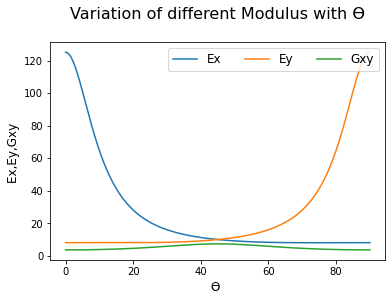

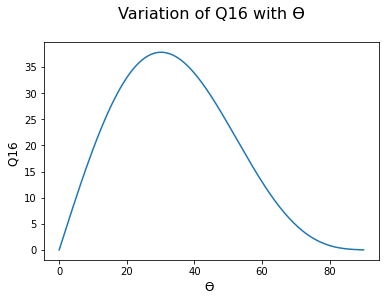


--------------------------------------------------------------------------------------------

ABD Matrix is: 

 [[81145.73462  9127.6752      0.         -0.         -0.          0.     ]
 [ 9127.6752  38882.93395     0.         -0.          0.          0.     ]
 [    0.          0.      10605.60129     0.          0.          0.     ]
 [   -0.         -0.          0.       9294.07764   652.53808   542.73412]
 [   -0.          0.          0.        652.53808   924.51446    94.96451]
 [    0.          0.          0.        542.73412    94.96451   775.69859]]

 For further calculations convenience the unit of A here is GPa-mm, B is GPa and D is GPa/mm. 


--------------------------------------------------------------------------------------------

 
 

Calculation of Margin of safety using Hashins Criteria
--------------------------------------------------------------------------------------------

---------------------------------------------------------------------
 Laminate no.     Pl

In [2]:
from Program_7_Final import *